# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Cell 1
# importing all classes and libraries

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets import base
from tensorflow.python.framework import dtypes
from tensorflow.contrib.layers import flatten

# Visualizations will be shown in the notebook.
%matplotlib inline

# number of classes
n_classes=43
working_dir = 'C:\\Users\\Ali\\Desktop\\Car_ND-Lab2\\'


In [2]:
# Cell 2

# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = working_dir+"train.p"
testing_file = working_dir+"test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


# going forward in each cell the following dataset variavbles will be used as input:
# X_trn_in, Training features
# y_trn_in, Training labels
# X_val_in, Validation features (may or may not be present in a cell)
# y_val_in, Validation labels (may or may not be present in a cell)
# X_tst_in, Test features
# y_tst_in,  Test labels
#
# similarly, the following output variables will be used:
# X_trn_outN, Training features
# y_trn_outN, Training labels
# X_val_outN, Validation features (may or may not be present in a cell)
# y_val_outN, Validation labels (may or may not be present in a cell)
# X_tst_outN, Test features
# y_tst_outN, Test labels
# where N is the cell number

# assigning input/output dataset variables
X_trn_in = X_train
y_trn_in = y_train
X_tst_in = X_test
y_tst_in = y_test
X_trn_out1 = X_trn_in
y_trn_out1 = y_trn_in
X_tst_out1 = X_tst_in
y_tst_out1 = y_tst_in


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
# Cell 3

# assigning input/output dataset variables
X_trn_in = X_trn_out1
y_trn_in = y_trn_out1
X_tst_in = X_tst_out1
y_tst_in = y_tst_out1
X_trn_out2 = X_trn_out1
y_trn_out2 = y_trn_out1
X_tst_out2 = X_tst_out1
y_tst_out2 = y_tst_out1

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_trn = X_trn_in.shape[0]

# TODO: Number of testing examples.
n_tst = X_tst_in.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_trn_in[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_trn_in))

print("Number of training examples =", n_trn)
print("Number of testing examples =", n_tst)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

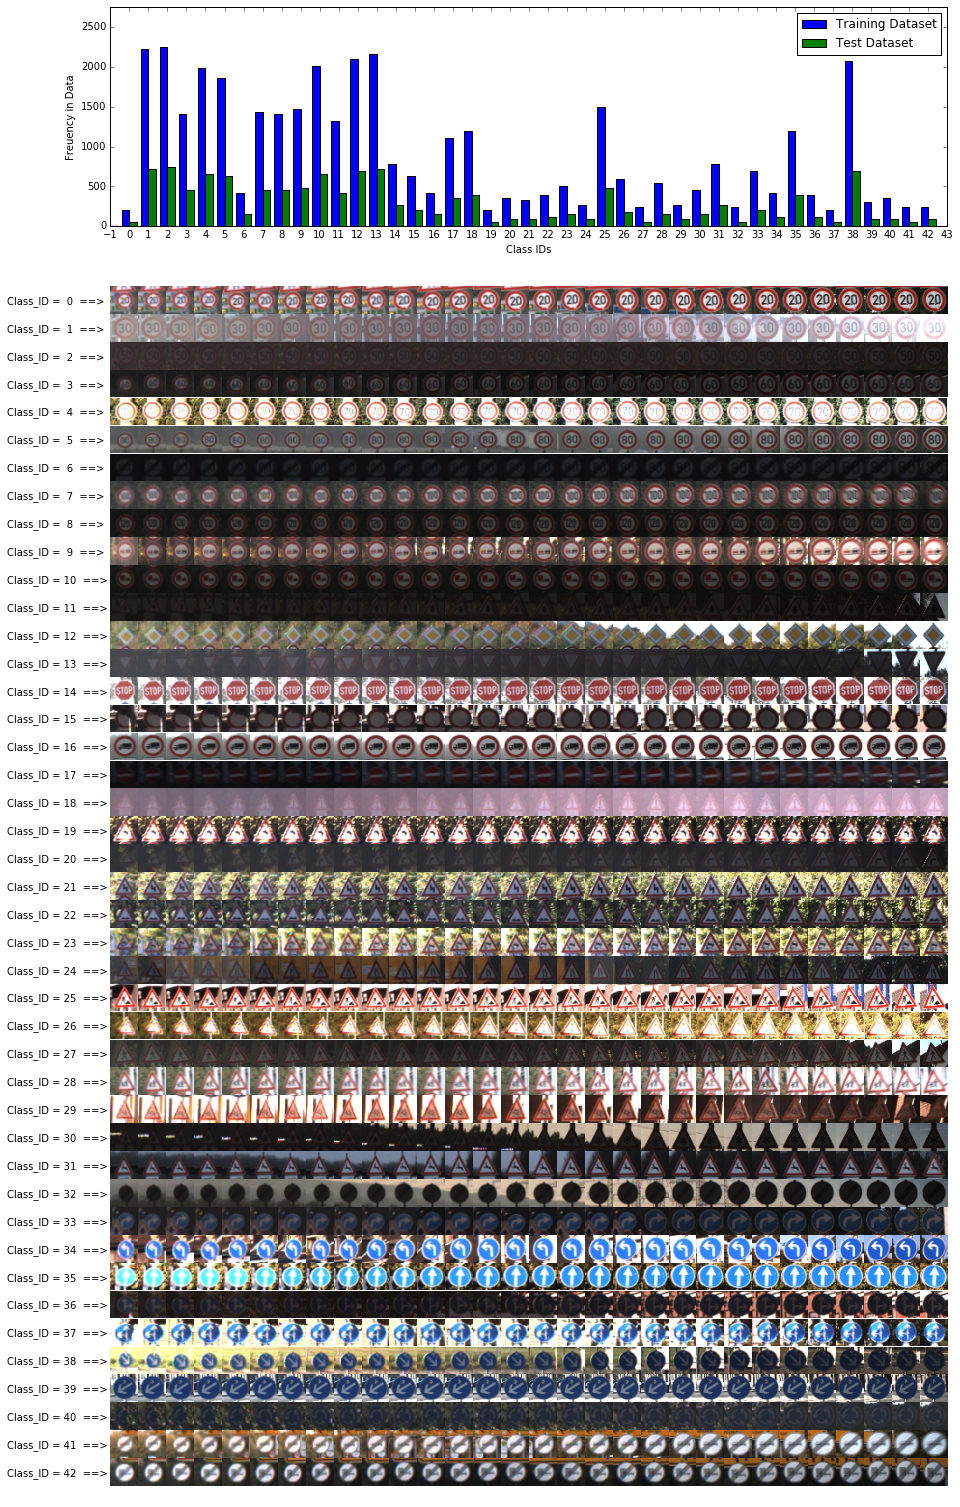

In [4]:
# Cell 4

# assigning input/output dataset variables
X_trn_in = X_trn_out2
y_trn_in = y_trn_out2
X_tst_in = X_tst_out2
y_tst_in = y_tst_out2
X_trn_out3 = X_trn_out2
y_trn_out3 = y_trn_out2
X_tst_out3 = X_tst_out2
y_tst_out3 = y_tst_out2

### Data exploration and visualization goes here.
### Feel free to use as many code cells as needed.


def plot_rows(ax_list, grid_fig, num_rows, num_cols, image_offset, grid_offset, dataset, class_id=-1, cmap=None, verbose=True):
    """
    plots a panel or snapshot of the images in the dataset in a gridspace that is pre-defined.
    as_list:  list of axes containing each grid item. it will be appended with new images and returned.
    grid_fig: previously set up gridSpec
    num_rows: number of rows in gridSpec
    num_cols: number of columns in girdSpec
    image_offset: the index/offset of the first image in the dataset to be plotted.
    grid_offset:  the index of the first grid cell to be used for plotting.
    dataset: dataset containing images
    class_id: if -1 the index will be printed besides each row; if not, class_id will be printed beside each row.
    cmap: cmap parameter will be passed on the imshow.
    """
    for i in range(num_cols*num_rows):
        ax_list.append(plt.subplot(grid_fig[i+grid_offset]))
        ax_list[-1].imshow(dataset[(i+image_offset)], cmap=cmap)
        ax_list[-1].axis('off')
        ax_list[-1].set_aspect('equal')
        if verbose:
            if i % num_cols == 0:
                if class_id==-1:
                    ax_list[-1].text(-130,20,'Sign No. = %4d  ==>' % ((i+image_offset)//num_cols))
                else:
                    ax_list[-1].text(-120,20,'Class_ID = %2d  ==>' % (class_id))
    return ax_list


# defining the grid space and other  parameters
sign_rows = n_classes
num_cols = 30
upper_chart_height_in_rows = 10
num_rows = upper_chart_height_in_rows+sign_rows
g_fig = gridspec.GridSpec(num_rows,num_cols) 
g_fig.update(wspace=0.01, hspace=0.01)

# setting up the figure
fig = plt.figure(figsize=(num_cols/2,num_rows/2))


# upper plot showing the frequency of data in training and test datasets
ax0 = plt.subplot2grid((num_rows,num_cols),(0,0),colspan=num_cols,rowspan=upper_chart_height_in_rows-2)
bins = [x-1 for x in list(range(45))]
ax0.hist([y_trn_in, y_tst_in], bins, align='left')
ax0.set_xbound(lower=0, upper=n_classes)
ax0.set_xticks(bins)
ax0.set_xlabel('Class IDs')
ax0.set_ylabel('Freuency in Data')
ax0.set_ylim([0,2750])
ax0.legend(['Training Dataset', 'Test Dataset'])


# plotting the first 30 images for each class_id in training data 
# the images have bene extracted from a movie and each sign contains 30 frames except one of the sings,
# because number of training data points are 39209, which is not divisible by 30
ax_list = []
cur_id = 0
for i in range(n_classes):
    index = 0
    while (index < y_trn_in.shape[0]) and (y_trn_in[index] != cur_id):
        index += 1
    plot_rows(ax_list, g_fig, 1, num_cols, index, num_cols*(i+upper_chart_height_in_rows), X_trn_in, class_id=cur_id)
    cur_id += 1


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
# Cell 5

# assigning input/output dataset variables
X_trn_in = X_trn_out3
y_trn_in = y_trn_out3
X_tst_in = X_tst_out3
y_tst_in = y_tst_out3
X_trn_out4 = X_trn_out3
y_trn_out4 = y_trn_out3
X_tst_out4 = X_tst_out3
y_tst_out4 = y_tst_out3

### Preprocessing the data #1.

"""
Performing one-hot-encoding on labels
"""

# defining the OneHotEncoder class, reshaping the label data and fitting/transforming to ohe format
enc = OneHotEncoder(dtype=np.float32)
y_trn_out4 = enc.fit_transform(y_trn_in.reshape(-1,1)).toarray()
y_tst_out4 = enc.fit_transform(y_tst_in.reshape(-1,1)).toarray()

print("training dataset type/shape before and after one-hot-encoding:")
print(type(y_trn_in),'/',y_trn_in.shape, "===>", type(y_trn_out4),'/',y_trn_out4.shape)
print("test dataset type/shape before and after one-hot-encoding:")
print(type(y_tst_in),'/',y_tst_in.shape, "===>", type(y_tst_out4),'/',y_tst_out4.shape)

training dataset type/shape before and after one-hot-encoding:
<class 'numpy.ndarray'> / (39209,) ===> <class 'numpy.ndarray'> / (39209, 43)
test dataset type/shape before and after one-hot-encoding:
<class 'numpy.ndarray'> / (12630,) ===> <class 'numpy.ndarray'> / (12630, 43)


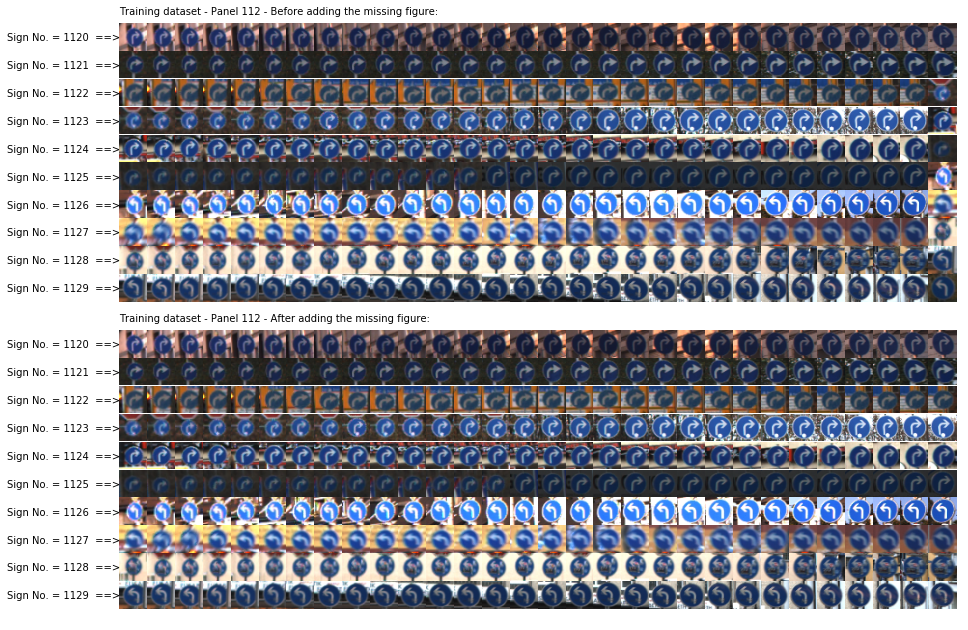

In [6]:
# Cell 6

### Preprocessing the data #2.

"""
every 30 pictures are essentially frames from the same movie/sign that are taken every 1 seconds apart.
it makes sense to treat every 30 frames as one training sample for selecting validation and training sets.
i.e. if validation set is taken randomly, then it will artificially have high accuracy becasue it overlaps 
the training set.
because the size of training dataset is 39209, one of the signs has 29 frames instead of 30. in this box, 
the signs are plotted in panels to fibure out which one has 29 frames instead of 30, and then one frame will be
added to make training data divisible by 30.
Sign images in the training dataset are visualized here to find the one instance/sign that has less than 30 frames, 
and are visualized again after adding the missing frame.
"""

# assigning input/output dataset variables
X_trn_in = X_trn_out4
y_trn_in = y_trn_out4
X_tst_in = X_tst_out4
y_tst_in = y_tst_out4
X_trn_out5 = X_trn_out4
y_trn_out5 = y_trn_out4
X_tst_out5 = X_tst_out4
y_tst_out5 = y_tst_out4


num_cols = 30
num_rows = 10  # number os signs that will be shown in each panel

grid_fig = gridspec.GridSpec((num_rows+1)*2,num_cols) 
grid_fig.update(wspace=0.01, hspace=0.01)
plt.figure(figsize=(num_cols/2,num_rows+1))

ax_list = []

# plotting the first sign in training data in each category
panel = 112  # every "num_cols x num_rows" images is visualized in a panel to iterate through all iamges.
offset = panel * num_cols * num_rows
plot_rows(ax_list, grid_fig, num_rows, num_cols, offset, grid_offset=num_cols, dataset=X_trn_in)

# sign number 1122 is an incomplete set. picture number 33688 will be inserted at position 33688 to make the
# set complete.
X_trn_out5 = np.insert(X_trn_in, 33688, X_trn_in[33688], axis=0)
y_trn_out5 = np.insert(y_trn_in, 33688, y_trn_in[33688], axis=0)

# plotting the same panel as before with the new photo added
offset = panel * num_cols * num_rows
plot_rows(ax_list, grid_fig, num_rows, num_cols, offset, grid_offset=(num_rows+2)*num_cols, dataset=X_trn_out5)
        
ax_list[0].text(0,-10,'Training dataset - Panel %s - Before adding the missing figure:' % panel)
ax_list[num_rows*num_cols].text(0,-10,'Training dataset - Panel %s - After adding the missing figure:' % panel)

Pixel value statistics
min =  3
max =  255
mean =  81.9001728224
std =  67.2407090976
pre-processed shape =  (39210, 32, 32, 3)
post-processed shape =  (39210, 32, 32)


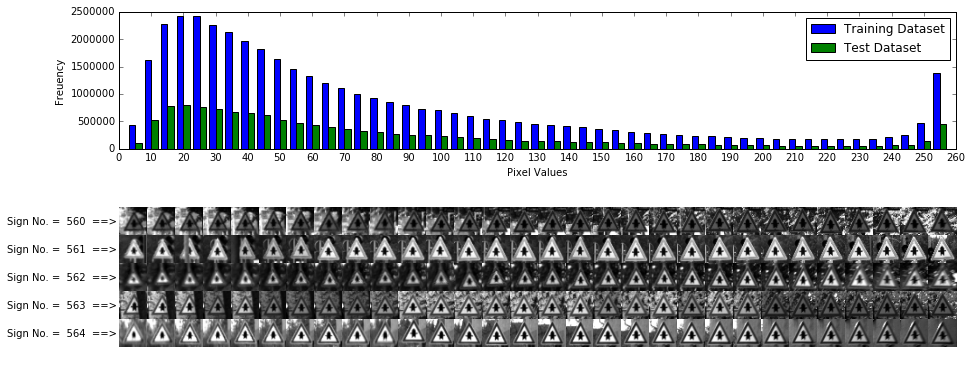

In [7]:
# Cell 7

### Preprocessing the data #3.

""" 
Making grayscale images from the color images. The paper by Pierre Sermanet and Yann Lecun (2011) 
suggested that monochrome images improved the classification task.
"""

# assigning input/output dataset variables
X_trn_in = X_trn_out5
y_trn_in = y_trn_out5
X_tst_in = X_tst_out5
y_tst_in = y_tst_out5
X_trn_out6 = X_trn_out5
y_trn_out6 = y_trn_out5
X_tst_out6 = X_tst_out5
y_tst_out6 = y_tst_out5


def color_to_gray(list_of_images):
    # changing the color to gray
    result_ndarray = np.asarray([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in list_of_images])
    return(result_ndarray)


# converting to grayscale
X_trn_out6 = color_to_gray(X_trn_in)
X_tst_out6 = color_to_gray(X_tst_in)


# initializaing a figure/parameters and plotting sample rows of sign images to verify
num_cols = 30
hist_rows = 7 # height of the histogram in rows
sign_rows = 5 # number of rows for sample sign images
num_rows = hist_rows+sign_rows  # total number of rows in gridspace

grid_fig = gridspec.GridSpec(num_rows,num_cols) 
grid_fig.update(wspace=0.01, hspace=0.01)
plt.figure(figsize=(num_cols/2,num_rows/2))

ax_list = []
panel = 112  # every "num_cols x sign_rows" images is visualized in a panel to iterate through iamges.
offset = panel * num_cols * sign_rows

# upper plot showing the frequency of pixel values
ax0 = plt.subplot2grid((num_rows,num_cols),(0,0),colspan=num_cols,rowspan=hist_rows-2)
bins = [x-10 for x in list(range(275))]
ax0.hist([X_trn_out6.flatten(),X_tst_out6.flatten()], bins[5::5], align='left')
ax0.set_xbound(lower=0, upper=260)
ax0.set_xticks(bins[10::10])
ax0.set_xticklabels(bins[10::10])
ax0.set_xlabel('Pixel Values')
ax0.set_ylabel('Freuency')
ax0.legend(['Training Dataset', 'Test Dataset'])

a = plot_rows(ax_list, grid_fig, sign_rows, num_cols, offset, hist_rows*num_cols, dataset=X_trn_out6, cmap='gray')

print('Pixel value statistics')
print('min = ', X_trn_out6.min())
print('max = ', X_trn_out6.max())
print('mean = ', X_trn_out6.mean())
print('std = ', X_trn_out6.std())
#
print('pre-processed shape = ', X_trn_in.shape)
print('post-processed shape = ', X_trn_out6.shape)

Pixel value statistics
min =  0
max =  255
mean =  131.70189482
std =  73.9093193381
pre-processed shape =  (39210, 32, 32)
post-processed shape =  (39210, 32, 32)


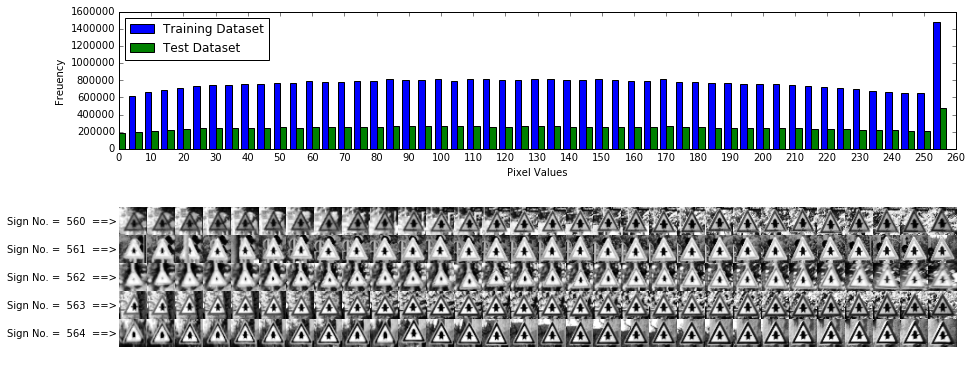

In [8]:
# Cell 8

### Preprocessing the data #4.

""" 
equalizing histogram
"""

# assigning input/output dataset variables
X_trn_in = X_trn_out6
y_trn_in = y_trn_out6
X_tst_in = X_tst_out6
y_tst_in = y_tst_out6
X_trn_out7 = X_trn_out6
y_trn_out7 = y_trn_out6
X_tst_out7 = X_tst_out6
y_tst_out7 = y_tst_out6

def hist_equalize(list_of_images):
    #equalizing histogram
    result_ndarray = np.asarray([cv2.equalizeHist(image) for image in list_of_images])
    return result_ndarray

# euqalizing histogram
X_trn_out7 = hist_equalize(X_trn_in)
X_tst_out7 = hist_equalize(X_tst_in)

# initializaing a figure with associated parameters and plotting sample rows of sign images to verify
num_cols = 30
hist_rows = 7 # height of the histogram in rows
sign_rows = 5 # number of rows for sample sign images
num_rows = hist_rows+sign_rows  # total number of rows in gridspace

grid_fig = gridspec.GridSpec(num_rows,num_cols) 
grid_fig.update(wspace=0.01, hspace=0.01)
plt.figure(figsize=(num_cols/2,num_rows/2))

ax_list = []
panel = 112  # every "num_cols x sign_rows" images is visualized in a panel. this number is changed to iterate through iamges.
offset = panel * num_cols * sign_rows

# upper plot showing the frequency of pixel values
ax0 = plt.subplot2grid((num_rows,num_cols),(0,0),colspan=num_cols,rowspan=hist_rows-2)
bins = [x-10 for x in list(range(275))]
ax0.hist([X_trn_out7.flatten(),X_tst_out7.flatten()], bins[5::5], align='left')
ax0.set_xbound(lower=0, upper=260)
ax0.set_xticks(bins[10::10])
ax0.set_xticklabels(bins[10::10])
ax0.set_xlabel('Pixel Values')
ax0.set_ylabel('Freuency')
ax0.legend(['Training Dataset', 'Test Dataset'],loc='upper left')

a = plot_rows(ax_list, grid_fig, sign_rows, num_cols, offset, hist_rows*num_cols, dataset=X_trn_out7, cmap='gray')

print('Pixel value statistics')
print('min = ', X_trn_out7.min())
print('max = ', X_trn_out7.max())
print('mean = ', X_trn_out7.mean())
print('std = ', X_trn_out7.std())
#
print('pre-processed shape = ', X_trn_in.shape)
print('post-processed shape = ', X_trn_out7.shape)

In [9]:
# Cell 9

### Preprocessing the data #5.
# This cell is intentionally left blank.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
The following pipeline processing was performed on training/test datasets **(i.e. Cells 5,6,7,8 and 12)**:

1- Performed one-hot-encoding on y data (both training and test datasets). This is required for calculating categorical cross entropy loss. **(Cell 5)**

2- As explained in http://benchmark.ini.rub.de website, every 30 consecutive images in the datasets relate to the same sign and are taken from a movie at 1 seconds apart (i.e. referred to as track herein). However, the original size of the training dataset suggests that one of the tracks should contain 29 frames instead of 30. In cell 6 I plotted various tracks of images in order to find the missing photo, and I added one to that track to make it whole. Later on, I included each track in only one of the training or validation datasets with the intention to separate these datasets completely. I expect the accuracy of validation dataset will be lower with this technique, but it should result in better regularization overall (i.e. I expect the accuracy of the test dataset should be relatively high) This operation only affected the training dataset. **(Cell 6)**

3- Converted the images to grayscale. The Sermanet and LeCun (2011) paper suggests that taking the Y channel from the YUV transformation enhanced the training (using their architecture), which is similar to making the picture grayscale. The histogram of the pixel values are also plotted, which indicates that the distribution of pixel values is not uniformly or normally distributed. **(Cell 7)**

4- the histogram of all the images in the training and test datasets were equalized using functions in OpenCV. The histogram of the equalized images are plotted/explored, which indicates a much better distribution centered around the mean value (i.e. almost uniformly distributed). **(Cell 8)**

5- The pixel values were normalized to conform to a range of -0.005 and +0.005. As explained in the course material, normalization should provide better learning behaviour. This operation, although considered part of pre-processing, was done in Cell 12 below after additional images were generated and added to the training and validation datasets. The reason it was done last was because some of the image manipulations and checking required pixel values to be positive. The choice of the range of final values (i.e. -0.005 to +0.005) was by trial and error by considering the range that resulted in better/faster learning. **(Cell 12)**

---


Shape of training set X/y:  (33300, 32, 32) (33300, 43)
Shape of validation set X/y:  (5910, 32, 32) (5910, 43)
Shape of test set X/y:  (12630, 32, 32) (12630, 43)


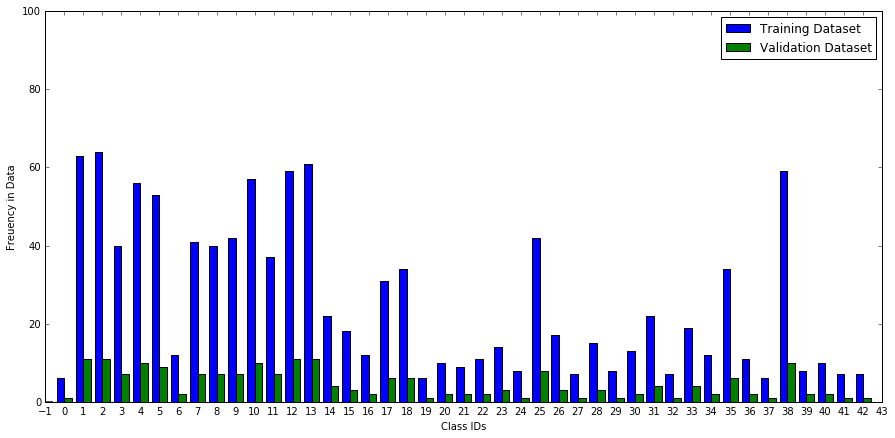

In [10]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Cell 10

# assigning input/output dataset variables
# by passing the pixel normalization for now.
X_trn_in = X_trn_out7
y_trn_in = y_trn_out7
X_tst_in = X_tst_out7
y_tst_in = y_tst_out7

track_ind_list = list(range(len(X_trn_in)//30))
y_labels_all = [y_trn_in[i*30].tolist().index(1) for i in track_ind_list]
X_trn_track_list, X_val_track_list, y_trn_labels, y_val_labels = train_test_split(track_ind_list, 
                                                                                  y_labels_all, 
                                                                                  test_size=0.15, random_state=832289, 
                                                                                  stratify=y_labels_all)


# Initializing the copying the training dataset ; extracting/copying in tracks/rows of 30 images
i = X_trn_track_list[0]
X_trn_out9 = X_trn_in[i*30:(i+1)*30]
y_trn_out9 = y_trn_in[i*30:(i+1)*30]
#
for i in X_trn_track_list[1:]:
    X_trn_out9 = np.append(X_trn_out9, X_trn_in[i*30:(i+1)*30], axis=0)
    y_trn_out9 = np.append(y_trn_out9, y_trn_in[i*30:(i+1)*30], axis=0)

    
# Initializing the copying the training dataset
i = X_val_track_list[0]
X_val_out9 = X_trn_in[i*30:(i+1)*30]
y_val_out9 = y_trn_in[i*30:(i+1)*30]
#
for i in X_val_track_list[1:]:
    X_val_out9 = np.append(X_val_out9, X_trn_in[i*30:(i+1)*30], axis=0)
    y_val_out9 = np.append(y_val_out9, y_trn_in[i*30:(i+1)*30], axis=0)

# not changing the test dataset
X_tst_out9 = X_tst_in
y_tst_out9 = y_tst_in

print('Shape of training set X/y: ', X_trn_out9.shape, y_trn_out9.shape)
print('Shape of validation set X/y: ', X_val_out9.shape, y_val_out9.shape)
print('Shape of test set X/y: ', X_tst_out9.shape, y_tst_out9.shape)


# initializaing a figure with associated parameters and plotting a histogram showing y labels
# in training and validation sets to check the stratification
fig, ax0 = plt.subplots(figsize=(15,7))
bins = [x-1 for x in list(range(45))]
ax0.hist([y_trn_labels, y_val_labels], bins, align='left')
ax0.set_xbound(lower=0, upper=n_classes)
ax0.set_xticks(bins)
ax0.set_xlabel('Class IDs')
ax0.set_ylabel('Freuency in Data')
ax0.set_ylim([0,100])
ax0.legend(['Training Dataset', 'Validation Dataset'])


x and y training dataset shapes before and after adding transformed images:
(33300, 32, 32) / (33300, 43)  ==>  (129000, 32, 32) - (129000, 43)

x and y training dataset shapes before and after adding transformed images:
(5910, 32, 32) / (5910, 43)  ==>  (19350, 32, 32) - (19350, 43)



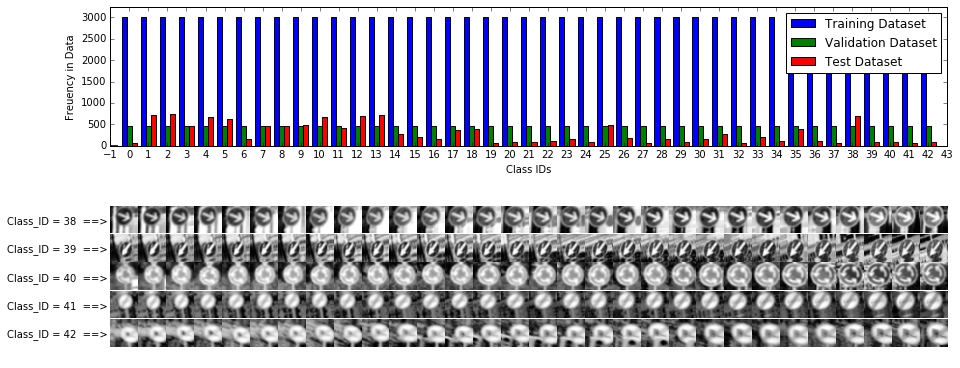

In [11]:
# Cell 11

### Generate additional data (OPTIONAL!)
# As shown in the output of Cell 3, the training data is not distributed evenly between various class_ids.
"""
Generating additional training data such that we have equal number of training sets for each class-id
"""

# assigning input/output dataset variables
X_trn_in = X_trn_out9
y_trn_in = y_trn_out9
X_tst_in = X_tst_out9
y_tst_in = y_tst_out9
X_val_in = X_val_out9
y_val_in = y_val_out9
X_trn_out10 = X_trn_out9
y_trn_out10 = y_trn_out9
X_tst_out10 = X_tst_out9
y_tst_out10 = y_tst_out9
X_val_out10 = X_val_out9
y_val_out10 = y_val_out9


def img_transform(list_of_images, max_move, max_rotate, max_scale_diff, max_affine):
    """
    applies random translation to images
    list_of_images: is the input ndarray of images
    max_move: is maximum absolute number of pixels for transformation - i.e. 5 means from -5 to 5 pixels
    max_rotate: is the maximum absolute angle of rotation - i.e. 10 meanse from -10 to +10 degrees
    max_scale_diff: is the maximum scaling factor minus 1 in absolute terms - i.e. 0.3 means from 0.7 to 1.3 scaling
    max_affine: is the maximum move of the (25, 25) point in absolute terms. the other two points of (7, 7), and (7, 25)
    will not move.
    """
    # extracting image sizes and setting border mode
    num_rows = list_of_images[0].shape[0]
    num_cols = list_of_images[0].shape[1]
    bm = cv2.BORDER_REFLECT
    
    # translating images
    t_x = np.random.uniform()*max_move*2-max_move
    t_y = np.random.uniform()*max_move*2-max_move
    trans_m = np.float32([[1,0,t_x],[0,1,t_y]])
    res_list1 = [cv2.warpAffine(img,trans_m,(num_cols,num_rows),borderMode=bm) for img in list_of_images]
    
    # rotating images
    t_r = np.random.uniform()*max_rotate*2-max_rotate
    t_s = np.random.uniform()*max_scale_diff*2-max_scale_diff+1
    rot_m = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),t_r,t_s)
    res_list2 = [cv2.warpAffine(img,rot_m,(num_cols,num_rows),borderMode=bm) for img in res_list1]
    
    # affine transform
    a_m1 = np.float32([[7,7],[25,25],[7,25]])
    t_a = np.random.uniform()*max_affine*2-max_affine
    a_m2 = np.float32([[7,7],[25+t_a,25+t_a],[7,25]])
    aft_m = cv2.getAffineTransform(a_m1, a_m2)
    res_list3 = [cv2.warpAffine(img,aft_m,(num_cols,num_rows),borderMode=bm) for img in res_list2]
    
    result_ndarray = np.asarray(res_list3)
    return result_ndarray



def generate_and_add_one_track(x_data, y_data, start_index, end_index):
    """
    transforms a series of images in the dataset and appends the transformed ndarray to the end 
    for both x_data and y_data. no transformation are done on y_data during the process.
    """
    x_sample = x_data[start_index:end_index]
    y_sample = y_data[start_index:end_index]
    transformed_x_sample = img_transform(x_sample, max_move=5, max_rotate=15, max_scale_diff=0.2, max_affine=5)
    return np.append(x_data,transformed_x_sample, axis=0), np.append(y_data,y_sample, axis=0)
    

def generate_and_add_to_dataset(X_in, y_in, total_desired_size):
    """
    This function brings the size of the X_in and y_in to the total_desired_size
    by generating transformed verstions of random tracks (i.e. each track is 30 images)
    and adding them to the datasets X_in and y_in.
    X_in is the features dataset
    y_in is the corresponding OHE label dataset
    total_desired_size is the total number of tracks (i.e. should be multiplied by 30 to get number of images)
    """
    
    # creating a dictionary of lists point to all signs for each class_id
    # each sign cotains 30 images, so only the index to the first of these 30 images are stored
    stats = {}
    for i in range(0,len(X_in),30):
        if y_in[i].tolist().index(1) not in stats.keys():
            stats[y_in[i].tolist().index(1)]=[i]
        else:
            stats[y_in[i].tolist().index(1)].append(i)
    s_lens = [len(stats[i]) for i in stats.keys()]  # list contains number of signs in each class_id

    # initializing outputs
    X_out = X_in
    y_out = y_in
    
    # images will be selected from the class_id with lowest number of instances in each iteration.
    # num_additional_signs * 30 images will be added to the training database
    new_s_lens = s_lens
    # number of additional signs to be added to the training dataset - each sign contains 30 images
    num_additional_signs = total_desired_size-(X_in.shape[0]//30) 
    for i in range(num_additional_signs):
        min_class_id = new_s_lens.index(min(new_s_lens))
        source_index = stats[min_class_id][int(np.random.uniform()*len(stats[min_class_id]))]
        X_out, y_out = generate_and_add_one_track(X_out, y_out, source_index, source_index+30)
        new_s_lens[min_class_id] += 1
    
    return X_out, y_out


# updating training datasets
X_trn_out10, y_trn_out10 = generate_and_add_to_dataset(X_trn_in, y_trn_in, n_classes*100) # 100 tracks per class_id
print('x and y training dataset shapes before and after adding transformed images:')
print(X_trn_in.shape,'/',y_trn_in.shape,' ==> ',X_trn_out10.shape,'-',y_trn_out10.shape)
print('')

# updating validation datasets
X_val_out10, y_val_out10 = generate_and_add_to_dataset(X_val_in, y_val_in, n_classes*15) # 15 tracks per class_id
print('x and y training dataset shapes before and after adding transformed images:')
print(X_val_in.shape,'/',y_val_in.shape,' ==> ',X_val_out10.shape,'-',y_val_out10.shape)
print('')

   
    
# initializaing a figure with associated parameters and plotting histogram plus 
# (pre and post) trnasformed images to verify
num_cols = 30
hist_rows = 7 # height of the histogram in rows
pre_rows = 5 # number of pre-transformed rows 
post_rows = 0 # number of post-transformed rows
num_rows = pre_rows+post_rows+hist_rows  # total number of rows in gridspace

grid_fig = gridspec.GridSpec(num_rows,num_cols) 
grid_fig.update(wspace=0.01, hspace=0.01)
plt.figure(figsize=(num_cols/2,num_rows/2+0.1))
ax_list=[]

# upper plot showing the frequency of pixel values
y_trn_out10_labels = np.asarray([item.tolist().index(1) for item in y_trn_out10])
y_val_out10_labels = np.asarray([item.tolist().index(1) for item in y_val_out10])
y_tst_out10_labels = np.asarray([item.tolist().index(1) for item in y_tst_out10])
ax0 = plt.subplot2grid((num_rows,num_cols),(0,0),colspan=num_cols,rowspan=hist_rows-2)
bins = [x-1 for x in list(range(45))]
ax0.hist([y_trn_out10_labels, y_val_out10_labels, y_tst_out10_labels], bins, align='left')
ax0.set_xbound(lower=0, upper=n_classes)
ax0.set_xticks(bins)
ax0.set_xlabel('Class IDs')
ax0.set_ylabel('Freuency in Data')
ax0.set_ylim([0,3250])
ax0.legend(['Training Dataset', 'Validation Dataset', 'Test Dataset'])

# plotting the last few instances in the training dataset to see if img_transform works propoerly
for i in range(pre_rows,0,-1):
    a0 = plot_rows(ax_list, grid_fig, 1, num_cols, len(X_trn_out10)-num_cols*i, (hist_rows+(pre_rows-i))*num_cols,
                                                                                 dataset= X_trn_out10, 
                                                                                 class_id=y_trn_out10[len(y_trn_out10)-i*num_cols].tolist().index(1), 
                                                                                 cmap='gray')

In [12]:
# Cell 12

### Preprocessing the data #5.

""" 
normalizing pixel values to be between -0.005 and 0.005
"""

# assigning input/output dataset variables
X_trn_in = X_trn_out10
y_trn_in = y_trn_out10
X_tst_in = X_tst_out10
y_tst_in = y_tst_out10
X_val_in = X_val_out10
y_val_in = y_val_out10


def img_normalize(list_of_images):
    # Normalizing pixel values to be between -0.005 and 0.005
    result_ndarray = np.asarray([((image*1.0-127.5)/25500.0) for image in list_of_images])
    return result_ndarray

# normalizing images
X_trn_out11 = img_normalize(X_trn_in)
X_val_out11 = img_normalize(X_val_in)
X_tst_out11 = img_normalize(X_tst_in)
# initializing labels
y_trn_out11 = y_trn_out10
y_tst_out11 = y_tst_out10
y_val_out11 = y_val_out10


print('Pixel value statistics')
print('min = ', X_trn_out11.min())
print('max = ', X_trn_out11.max())
print('mean = ', X_trn_out11.mean())
print('std = ', X_trn_out11.std())
#
print(' ')
print('pre-processed shapes:')
print('training (X/y) = %s / %s' % (X_trn_in.shape, y_trn_in.shape))
print('validation (X/y) = %s / %s' % (X_val_in.shape, y_val_in.shape))
print('testing (X/y) = %s / %s' % (X_tst_in.shape, y_tst_in.shape))
print(' ')      
print('post-processed shapes:')
print('training (X/y) = %s / %s' % (X_trn_out11.shape, y_trn_out11.shape))
print('validation (X/y) = %s / %s' % (X_val_out11.shape, y_val_out11.shape))
print('testing (X/y) = %s / %s' % (X_tst_out11.shape, y_tst_out11.shape))



Pixel value statistics
min =  -0.005
max =  0.005
mean =  0.000165291170593
std =  0.00270905340205
 
pre-processed shapes:
training (X/y) = (129000, 32, 32) / (129000, 43)
validation (X/y) = (19350, 32, 32) / (19350, 43)
testing (X/y) = (12630, 32, 32) / (12630, 43)
 
post-processed shapes:
training (X/y) = (129000, 32, 32) / (129000, 43)
validation (X/y) = (19350, 32, 32) / (19350, 43)
testing (X/y) = (12630, 32, 32) / (12630, 43)


In [13]:
# Cell 13
## defining Class DataSet and building training validation and test datasets

class DataSet(object):

  def __init__(self,
               images,
               labels):
               
    """
    Construct a DataSet.
    """
        
    assert images.shape[0] == labels.shape[0], (
        'images.shape: %s labels.shape: %s' % (images.shape, labels.shape))
    
    self._num_examples = images.shape[0]
    images = images.astype(np.float32)
    self._images = images
    self._labels = labels
    self._epochs_completed = 0
    self._index_in_epoch = 0

  @property
  def images(self):
    return self._images

  @property
  def labels(self):
    return self._labels

  @property
  def num_examples(self):
    return self._num_examples

  @property
  def epochs_completed(self):
    return self._epochs_completed

  def next_batch(self, batch_size, fake_data=False):
    """Return the next `batch_size` examples from this data set."""

    start = self._index_in_epoch
    self._index_in_epoch += batch_size
    if self._index_in_epoch > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1
      # Shuffle the data
      perm = np.arange(self._num_examples)
      np.random.shuffle(perm)
      self._images = self._images[perm]
      self._labels = self._labels[perm]
      # Start next epoch
      start = 0
      self._index_in_epoch = batch_size
      assert batch_size <= self._num_examples
    end = self._index_in_epoch
    return self._images[start:end], self._labels[start:end]

trn_dataset = DataSet(X_trn_out11, y_trn_out11)
val_dataset = DataSet(X_val_out11, y_val_out11)
tst_dataset = DataSet(X_tst_out11, y_tst_out11)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1- train_test_split function from sklearn module was first used to split the training data into training and validation sets. I set aside about 15% of the data for the validation. Also, it was tried to have each track (i.e. every 30 images relating to the same sign) included in either training or validation set. This should help with regularization. Otherwise, if tracks were split between training and validation sets, then the accuracy of the validation set would be artificially high and close to the accuracy of the training dataset during training. Stratification was used during splitting to have the same general distribution of data over class_ids between training and validation datasets. **(Cell 10)**

2- Generated and added many tracks of 30 images to the training dataset. As observed previously, the distribution of the class_ids in the training dataset is not uniform, and some class_ids are less present in the dataset, while others are more present. Generating new images and adding them to the database can overcome this deficiency by creating a uniform distribution over all class_ids. That way, training will be equally effective on all class_idss. The newly generated images were transformed versions of the original tracks. the transformations were done by randomly translating (i.e. by 5 pixels), rotating (i.e. between -15 and 15 degrees) and affine transforming the images in each track and adding them to the datasets. Only the sizes of the training and validation datasets were changed by this operation. No additional data was generated for the test dataset. **(Cell 11)**

3- As indicated in the answer to question 1, the pixel values were normalized in the last step to conform to a range of -0.005 and +0.005. **(Cell 12)**


4- The testing dataset was not modified in anyway in order to keep the data completely separate and avoid cross-training and artificially high test accuracies. Only relevant pre-processing operations were done on the test dataset.

---


In [14]:
# Cell 14
### Define your architecture here.
### Feel free to use as many code cells as needed.
 
# Started from LeNet architecture:
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
# Finalized network has the following shape (through trial and error):
# INPUT -> CONV -> POOL -> ACT -> CONV -> ACT -> POOL -> DROPOUT -> FLATTEN -> FC -> ACT -> FC
 
def cnn_graph(x, keep_prob):
    
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1), name='x_reshape')
          
    # convolution 1
    conv1_w = tf.Variable(tf.truncated_normal((5,5,1,32)), name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(32), name='conv1_b')
    strides = [1,1,1,1]
    padding = 'VALID'
    conv1 = tf.nn.conv2d(x, conv1_w, strides, padding)
    conv1 = tf.nn.bias_add(conv1, conv1_b, name='conv1')
    # the output is 28x28x32
   
    # pooling 1
    p1_ksize = [1, 2, 2, 1]
    p1_ssize = [1, 2, 2, 1]
    padding = 'VALID'
    pool1 = tf.nn.max_pool(conv1, p1_ksize, p1_ssize, padding, name='pool1')
    # the out put is 14x14x32
    
    # activation 1
    act1 = tf.nn.relu(pool1, name='act1')
    # the output is 14x14x32
   
    # convolution 2
    conv2_w = tf.Variable(tf.truncated_normal((5,5,32,64)), name='conv2_w')
    conv2_b = tf.Variable(tf.zeros(64), name='conv2_b')
    strides = [1,1,1,1]
    padding = 'VALID'
    conv2 = tf.nn.conv2d(act1, conv2_w, strides, padding)
    conv2 = tf.nn.bias_add(conv2, conv2_b, name='conv2')
    # the output is 10x10x64
    
    # activation 2
    act2 = tf.nn.relu(conv2, name='act2')
    # the output is 10x10x64
    
    # pooling 2
    p2_ksize = [1, 2, 2, 1]
    p2_ssize = [1, 2, 2, 1]
    padding = 'VALID'
    pool2 = tf.nn.avg_pool(act2, p2_ksize, p2_ssize, padding, name='pool2')
    # the output is 5x5x64
    
    # dropout 1
    dp1 = tf.nn.dropout(pool2, keep_prob, name='dp1')
    
    #flattening the output
    flat_x = flatten(dp1)
    # the output is 1600 elements 1-D
   
    # fully connected 1
    w_full1 = tf.Variable(tf.truncated_normal((1600,128)), name='w_full1')
    b_full1 = tf.Variable(tf.zeros(128), name='b_full1')
    x_full1 = tf.add(tf.matmul(flat_x, w_full1),b_full1, name='x_full1')
    # the output is 128 elements 1-D
   
    # activation 3
    act3 = tf.nn.sigmoid(x_full1, name='act3')
    # the output is 128 elements 1-D
   
    # fully connected 2
    w_full2 = tf.Variable(tf.truncated_normal((128,n_classes)), name='w_full2')
    b_full2 = tf.Variable(tf.zeros(n_classes), name='b_full2')
    x_full2 = tf.add(tf.matmul(act3, w_full2),b_full2, name='x_full2')   
    # the output is 43 elements 1-D - i.e. the number of class_ids
   
    x = x_full2
   
    return x

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started with a LeNet architecture as explained in the classroom videos, and incrementally changed the components to improve the performance during training using only a few epochs of training at each increment. The final architecture that I settled for is a sequential feed forward architecture (i.e. similar to LeNet) and consists of the following components:
- INPUT -> CONV1 -> POOL1 -> ACT1 -> CONV2 -> ACT2 -> POOL2 -> DROPOUT1 -> FLATTEN -> FC1 -> ACT3 -> FC2

INPUT: Input of 32x32x1 shape

CONV1: Convolution with a 5x5x1 window and 32 output features with stride of 1 and valid padding - output shape of 28x28x32

POOL1: Max pooling - output shape of 14x14x32

ACT1: Relu activation - output shape of 14x14x32

CONV2: Convolution with a 5x5x32 window and 64 output features with stride of 1 and valid padding - output shape of 10x10x64

ACT2: Relu activation - output shape of 10x10x64

POOL2: Average pooling - output shape of 5x5x64

DROPOUT1: Dropout layer. I found out that due to the size of my network only high keep probabilities result in good training (i.e. 0.95 to 1.0) - output shape of 5x5x64

FLATTEN: Flattening the values - output shape of 1600 1-D

FC1: Fully connected layer with 1600 inputs and 128 outputs

ACT3: Sigmoid activation layer with 128 outputs

FC2: Fully connected layer with 43 outputs (i.e. number of class_ids)

---


In [55]:
# Cell 15

# defining global placeholder variables 
x = tf.placeholder(tf.float32, [None, 32, 32], name='x') # dataset consists of 32x32x1, normalized grayscale images
y = tf.placeholder(tf.float32, [None, n_classes], name='y') # Classify 43 class_ids
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
learning_rate = tf.placeholder(tf.float32) #learning rate
num_top = tf.placeholder(tf.int32) # k for top k operation


# definnig all global tensorflow operations here
cnn_res = cnn_graph(x, keep_prob)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(cnn_res, y), name='loss_op')
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate, name='opt').minimize(loss_op, name='train_op')
correct_prediction = tf.equal(tf.argmax(cnn_res, 1), tf.argmax(y, 1), name='correct_prediction')
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_op')
softmax_op = tf.nn.softmax(cnn_res, name='softmax_op')
top_five_op = tf.nn.top_k(softmax_op, k=num_top, sorted=True)


def init_variables(sess):
    sess.run(tf.global_variables_initializer())

def calculate_predictions(sess, image_array, n_top):
    '''
    Calculates the softmax probabilities from the output of the network and returns
    '''
    top_probs = sess.run(top_five_op, feed_dict={x: image_array, keep_prob:1.0, num_top:n_top})
    calc_probs = sess.run(softmax_op, feed_dict={x: image_array, keep_prob:1.0})
    values = np.array([top_probs.values])
    indices = np.array([top_probs.indices])

    return calc_probs, values, indices

    
def eval_data(sess, dataset, batch_size):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by batch_size
    # the remainder will be discarded.
    steps_per_epoch = dataset.num_examples // batch_size
    num_examples = steps_per_epoch * batch_size
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = dataset.next_batch(batch_size)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
        
    return total_loss/num_examples, total_acc/num_examples


def eval_all_datasets(sess, result_list, trn_d, val_d, tst_d, batch_size, cur_epoch_num=0, verbose=True):
    # Initial evaluation of all datasets
    trn_loss, trn_acc = eval_data(sess, trn_d, batch_size=batch_size)
    val_loss, val_acc = eval_data(sess, val_d, batch_size=batch_size)
    tst_loss, tst_acc = eval_data(sess, tst_d, batch_size=batch_size)
    result_list['epochs'].append(cur_epoch_num)
    result_list['trn_loss'].append(trn_loss)
    result_list['trn_acc'].append(trn_acc)
    result_list['val_loss'].append(val_loss)
    result_list['val_acc'].append(val_acc)
    result_list['tst_loss'].append(tst_loss)
    result_list['tst_acc'].append(tst_acc)
    if verbose:
        print("Epoch {}: ".format(cur_epoch_num), 
              "Training Dataset = {:.3f}/{:.3f} - ".format(trn_loss,trn_acc), 
              "Validation Dataset = {:.3f}/{:.3f} - ".format(val_loss,val_acc), 
              "Learning Rate = {:.6f}".format(l_rate))
    return result_list


def print_header(batch_size, epochs, l_rate):
    print('Training the model with the following hyper parameters:')
    print('batch size = {}, number of eopchs = {}, initial learning rate = {:.6f}'.format(batch_size, epochs, l_rate))
    print('Loss/Accuracy:')
    

def build_and_train_model(sess, display_step=1, batch_size=128, epochs=10, l_rate=0.003, save_file='', save_step=1):
    """
    Builds the graph and trains the model
    display_step: parameter specifying the output to be printed per number of epochs
    batch_size: batch size used for training
    epochs: total number of epochs
    l_rate: initial learning rate that is passed to the optimizer
    """
    
    saver = tf.train.Saver()
    prev_loss = 10 # used for adaptive setting of learning rate
    result_list={'epochs':[],'trn_loss':[],'trn_acc':[],'val_loss':[],'val_acc':[],'tst_loss':[],'tst_acc':[]}

    steps_per_epoch = trn_dataset.num_examples // batch_size
    num_examples = steps_per_epoch * batch_size

    result_list = eval_all_datasets(sess, result_list, trn_dataset, val_dataset, tst_dataset, 
                                    batch_size, cur_epoch_num=0, verbose=True)

    # Train model
    for i in range(epochs):
        for step in range(steps_per_epoch):
            batch_x, batch_y = trn_dataset.next_batch(batch_size)
            loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5, learning_rate:l_rate})

        result_list = eval_all_datasets(sess, result_list, trn_dataset, val_dataset, tst_dataset, 
                                        batch_size, cur_epoch_num=i+1, verbose=(i % display_step == 0))
        

        val_loss = result_list['val_loss'][-1]
        # adapting learning rate - reduces the lr to 50% if imporvement is smaller than 0.005
        if val_loss>=prev_loss-0.005:
            l_rate=max(l_rate*0.5,0.000001)

        prev_loss = val_loss

        # saving checkpoint
        if (save_file) and (i % save_step == 0):
            saver.save(sess, save_file, global_step=i)
            
    return result_list
            

        
def print_test_results(result_list):            
    
    # printing the evaluation resutls on the test dataset for the epoch with the lowest validation loss
    min_epoch = result_list['val_loss'].index(min(result_list['val_loss']))
    max_epoch = result_list['val_acc'].index(max(result_list['val_acc']))
    print('Lowest validation loss occured in Epoch: {}'.format(result_list['epochs'][min_epoch]))
    print('loss/accuracy of the test dataset at min validation loss (Epoch {}): {:.3f}/{:.3f}'.format(
            result_list['epochs'][min_epoch],
            result_list['tst_loss'][min_epoch],
            result_list['tst_acc'][min_epoch]))
    print('loss/accuracy of the test dataset at max validation accuracy (Epoch {}): {:.3f}/{:.3f}'.format(
            result_list['epochs'][max_epoch],
            result_list['tst_loss'][max_epoch],
            result_list['tst_acc'][max_epoch]))
    # test results during the last epoch
    print('loss/accuracy of the test dataset after the last Epoch (Epoch {}): {:.3f}/{:.3f}'.format(
            result_list['epochs'][-1],result_list['tst_loss'][-1],result_list['tst_acc'][-1]))
    print()



def plot_training_results(result_list, ax0, ax1, title):
    """
    Given a result_list from training plots the training and validation losses and accuracies and prints the
    loss/accuracy pertaining to the test set for the epoch at which lower validation loss occurred.
    """
    # visualizing training and validation data
    #
    ax0.plot(result_list['epochs'],result_list['trn_loss'],'r-',result_list['epochs'],result_list['val_loss'],'b-')
    ax0.set_xlabel('Epochs')
    ax0.set_ylabel(title+'Loss')
    ax0.legend(['Training Dataset', 'Validation Dataset'], loc='upper right')
    ax0.set_xticks(result_list['epochs'])
    ax0.set_xticklabels(result_list['epochs'])
    bins = [x/10 for x in list(range(0,44,4))]
    ax0.set_yticks(bins)
    ax0.set_yticklabels(bins)
    ax0.set_ylim(0,4)
    #
    ax1.plot(result_list['epochs'],result_list['trn_acc'],'r-',result_list['epochs'],result_list['val_acc'],'b-')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel(title+'Accuracy')
    ax1.legend(['Training Dataset', 'Validation Dataset'], loc='lower right')
    ax1.set_xticks(result_list['epochs'])
    ax1.set_xticklabels(result_list['epochs'])
    bins = [x/10 for x in list(range(0,11,1))]
    ax1.set_yticks(bins)
    ax1.set_yticklabels(bins)
    ax1.set_ylim(0,1)
    
    return


Training the model with the following hyper parameters:
batch size = 8, number of eopchs = 5, initial learning rate = 0.002
Loss/Accuracy:
Epoch 0:  Training Dataset = 15.011/0.024 -  Validation Dataset = 14.956/0.022 -  Learning Rate = 0.002000
Epoch 1:  Training Dataset = 3.833/0.023 -  Validation Dataset = 3.833/0.023 -  Learning Rate = 0.002000
Epoch 2:  Training Dataset = 3.818/0.023 -  Validation Dataset = 3.818/0.023 -  Learning Rate = 0.002000
Epoch 3:  Training Dataset = 3.826/0.023 -  Validation Dataset = 3.826/0.023 -  Learning Rate = 0.002000
Epoch 4:  Training Dataset = 3.783/0.023 -  Validation Dataset = 3.783/0.023 -  Learning Rate = 0.002000
Epoch 5:  Training Dataset = 3.794/0.023 -  Validation Dataset = 3.794/0.023 -  Learning Rate = 0.002000
Lowest validation loss occured in Epoch: 4
loss/accuracy of the test dataset at min validation loss (Epoch 4): 3.801/0.012
loss/accuracy of the test dataset at max validation accuracy (Epoch 2): 3.820/0.012
loss/accuracy of the t

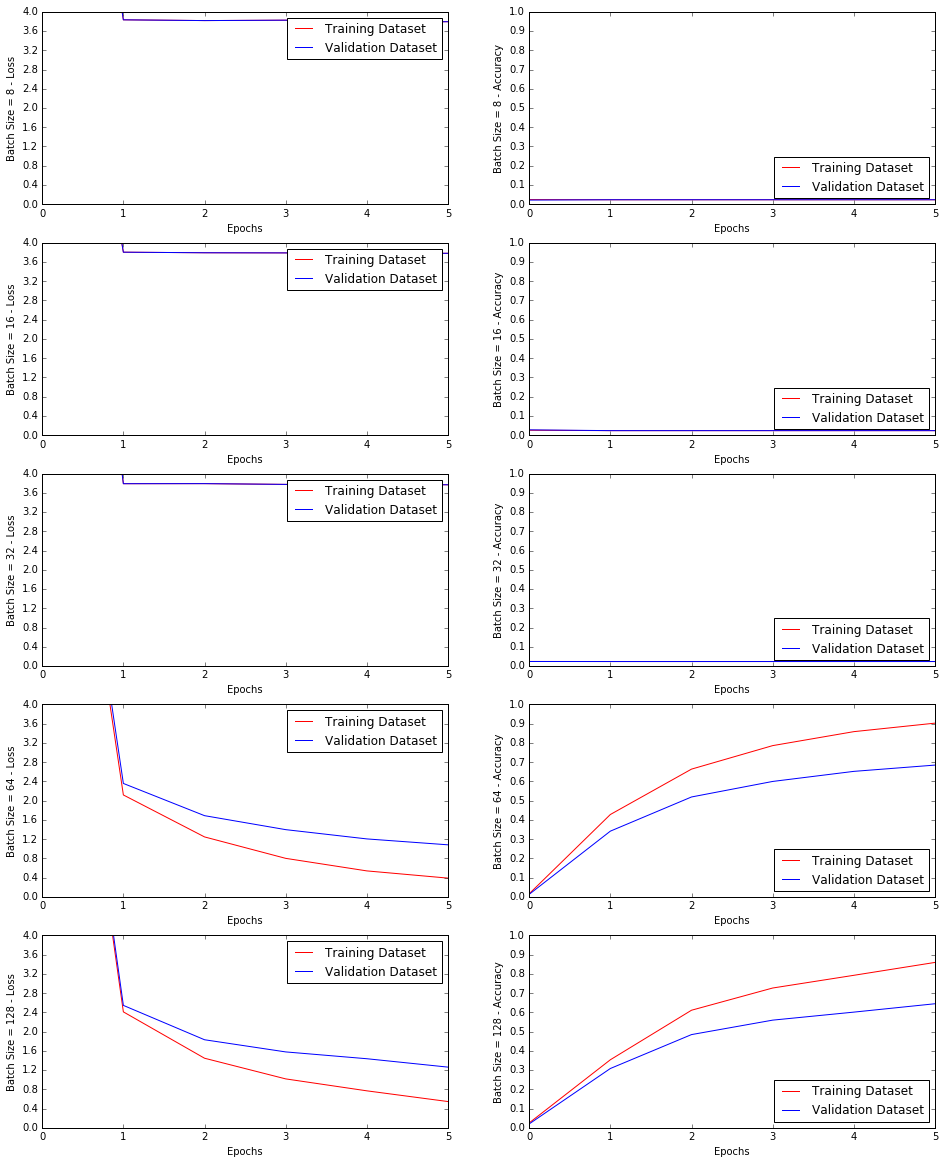

In [18]:
# Cell 16

# optimizing hyper_parameters
# trying different batch sizes to find out which one performs better

# opening a session
sess = tf.Session()

# setting hyper parameters 
batch_list=[8,16,32,64,128]
n_epochs=5
l_rate=0.002
iter_list = batch_list # plotting section uses iter_list for labeling
label_text = 'Batch Size = '

# building and training network for each hyper parameter combination
result_dict = {}
for b_size in batch_list:
    s_file = '' 
    print_header(b_size, n_epochs, l_rate)
    #
    init_variables(sess)
    result_dict[b_size] = build_and_train_model(sess, batch_size=b_size, epochs=n_epochs, l_rate=l_rate, save_file=s_file)
    #
    print_test_results(result_dict[b_size])

# initializaing a figure with associated parameters and plotting sample rows of sign images to verify
num_rows = len(iter_list)
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*8,num_rows*4))
for i in range(len(iter_list)):
    plot_training_results(result_dict[iter_list[i]], axes[i,0], axes[i,1], label_text+str(iter_list[i])+' - ')

# closing the session
sess.close()

Training the model with the following hyper parameters:
batch size = 64, number of eopchs = 5, initial learning rate = 0.002
Loss/Accuracy:
Epoch 0:  Training Dataset = 16.493/0.023 -  Validation Dataset = 16.376/0.020 -  Learning Rate = 0.002000
Epoch 1:  Training Dataset = 2.240/0.400 -  Validation Dataset = 2.534/0.322 -  Learning Rate = 0.002000
Epoch 2:  Training Dataset = 1.269/0.647 -  Validation Dataset = 1.937/0.470 -  Learning Rate = 0.002000
Epoch 3:  Training Dataset = 0.758/0.798 -  Validation Dataset = 1.503/0.580 -  Learning Rate = 0.002000
Epoch 4:  Training Dataset = 0.494/0.873 -  Validation Dataset = 1.286/0.640 -  Learning Rate = 0.002000
Epoch 5:  Training Dataset = 0.376/0.906 -  Validation Dataset = 1.132/0.675 -  Learning Rate = 0.002000
Lowest validation loss occured in Epoch: 5
loss/accuracy of the test dataset at min validation loss (Epoch 5): 0.398/0.888
loss/accuracy of the test dataset at max validation accuracy (Epoch 5): 0.398/0.888
loss/accuracy of the 

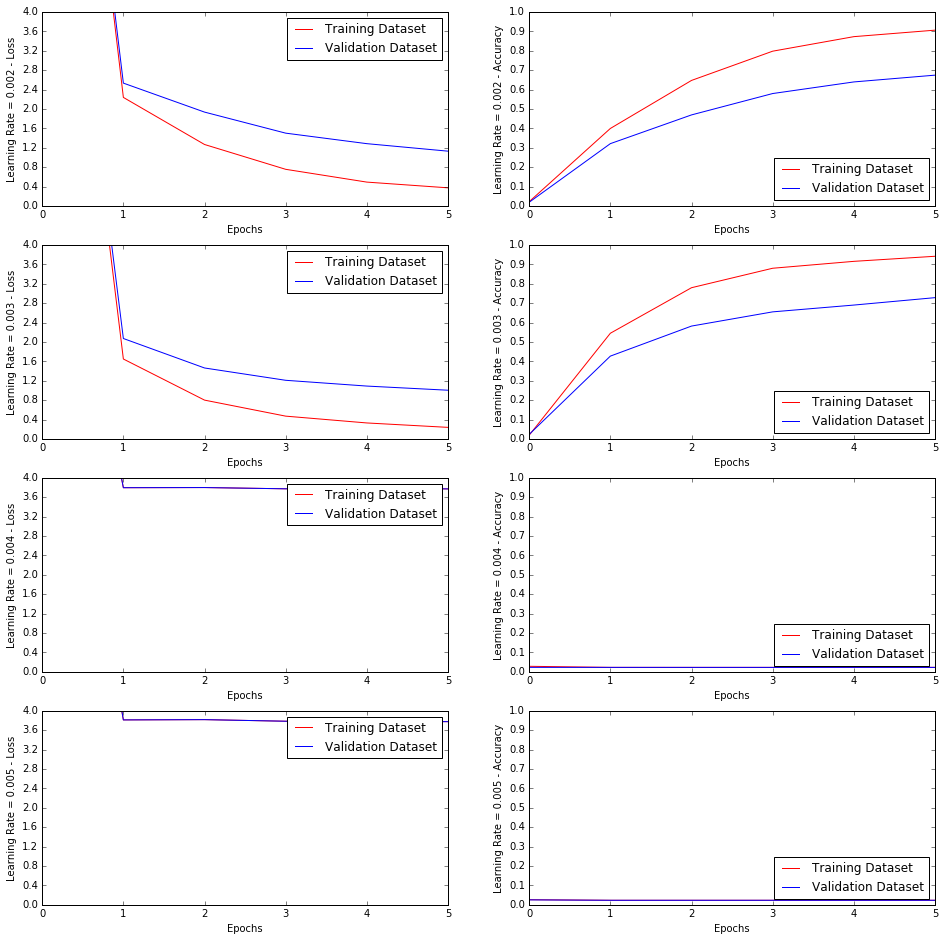

In [19]:
# Cell 17

# optimizing hyper_parameters
# trying different initial learning rates to find out which one performs better

# opening a session
sess = tf.Session()

# setting hyper parameters 
lr_list=[0.002,0.003,0.004,0.005]
b_size=64
n_epochs=5
l_rate=0.002
iter_list = lr_list # plotting section uses iter_list for labeling
label_text = 'Learning Rate = '

# building and training network for each hyper parameter combination
result_dict = {}
for l_rate in lr_list:
    s_file = '' 
    print_header(b_size, n_epochs, l_rate)
    #
    init_variables(sess)
    result_dict[l_rate] = build_and_train_model(sess, batch_size=b_size, epochs=n_epochs, l_rate=l_rate, save_file=s_file)
    #
    print_test_results(result_dict[l_rate])

# initializaing a figure with associated parameters and plotting sample rows of sign images to verify
num_rows = len(iter_list)
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*8,num_rows*4))
for i in range(len(iter_list)):
    plot_training_results(result_dict[iter_list[i]], axes[i,0], axes[i,1], label_text+str(iter_list[i])+' - ')

# closing the session
sess.close()

Training the model with the following hyper parameters:
batch size = 64, number of eopchs = 15, initial learning rate = 0.003000
Loss/Accuracy:
Epoch 0:  Training Dataset = 13.237/0.018 -  Validation Dataset = 13.148/0.021 -  Learning Rate = 0.003000
Epoch 1:  Training Dataset = 1.684/0.546 -  Validation Dataset = 2.119/0.414 -  Learning Rate = 0.003000
Epoch 2:  Training Dataset = 0.905/0.749 -  Validation Dataset = 1.660/0.535 -  Learning Rate = 0.003000
Epoch 3:  Training Dataset = 0.549/0.854 -  Validation Dataset = 1.365/0.612 -  Learning Rate = 0.003000
Epoch 4:  Training Dataset = 0.404/0.894 -  Validation Dataset = 1.246/0.654 -  Learning Rate = 0.003000
Epoch 5:  Training Dataset = 0.276/0.926 -  Validation Dataset = 1.163/0.686 -  Learning Rate = 0.003000
Epoch 6:  Training Dataset = 0.195/0.950 -  Validation Dataset = 1.091/0.703 -  Learning Rate = 0.003000
Epoch 7:  Training Dataset = 0.155/0.961 -  Validation Dataset = 1.031/0.729 -  Learning Rate = 0.003000
Epoch 8:  Trai

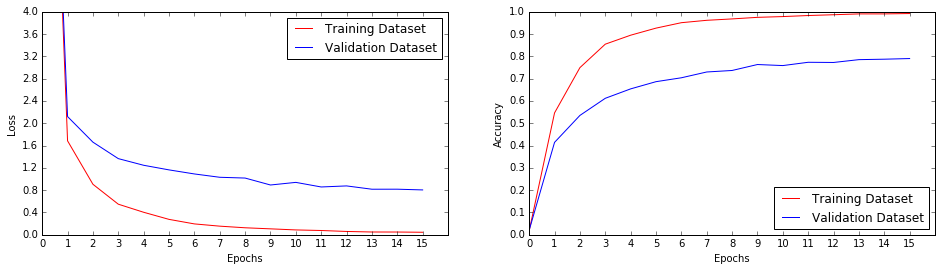

In [67]:
# Training the final model

# opening a session
sess = tf.Session()

# setting hyper parameters 
b_size=64
n_epochs=15
l_rate=0.003

label_text = ''

# building and training network for each hyper parameter combination
result_list = []
s_file = working_dir+'m1f'
print_header(b_size, n_epochs, l_rate)
#
init_variables(sess)
result_list = build_and_train_model(sess, batch_size=b_size, epochs=n_epochs, l_rate=l_rate, save_file=s_file)
#
print_test_results(result_list)  

# initializaing a figure with associated parameters and plotting sample rows of sign images to verify
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*8,num_rows*4))
plot_training_results(result_list, axes[0], axes[1], label_text)
    

In [205]:
# Closing the network if re-running the above cell for trial_and_error purposes.
# comment out the line below if the network is final.

# sess.close


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:**

*** The Choice of Optimizer: ***

   Three optimizers were tried: AdamOptimizer, GradientDescentOptimizer, and AdadelaOptimizer. AdamOptimizer was found to be far more superior to other optimization functions such as GradientDescentOptimizer and AdadelaOptimizer, and was used in the final optimization.

*** The Choice of Batch Size: ***

   A grid search was performed on the batch sizes to find out which batch size provides better learning characteristics. It was found that a batch size of 64 results in faster training. Batch sizes of smaller than 64 may not result in convergence of training due to the inclusion of dropout with probability of 50%. Generally smaller batch sizes result in higher sensitivity to learning rate and vice versa. For example, larger batch sizes provide a lot of stability with retards to the higher learning rates, but may require longer training epochs/time to achieve the same level of learning. 


*** The Choice of Learning Rate: ***

   An adaptive learning rate methodology was employed with an initial learning rate of 0.003. This methodology involves selecting an initial learning rate, and reducing the learning rate (by 50%) during training if the improvement of the validation loss was found to be smaller than a threshold (i.e. smaller than 0.005). A few initial learning rates were tried (i.e. through a grid search), and it was found that a learning rate of 0.003 provides the fastest training, while higher learning rates were found to result in non-convergence during training. 

*** The Choice of Epoch Numbers: ***

   Generally it was found that in approximately 10 to 15 epochs of training the accuracy of training dataset reaches very high values (i.e. more than 99% in the training example shown above). The accuracy of the validation dataset is generally lower (i.e. about 79% in the example training above) due to independent tracks of images being included in the validation dataset. The high accuracy of the predictions over the test dataset (i.e. more than 93%), however, indicates a very good regularization and learning during the process.

---


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Trial and error was a big part of solving this problem. I took the following approach:

1- I started with the LeNet architecture that is discussed in the course material. LeNet network appeared to be a good start because it was performing well on the MNIST dataset. 

2- Through trial and error various components of the network were tweaked/changed/replaced/added/deleted and the performance during the training was observed (i.e. only in 5 epochs to manage the training time). The changes to the network were made incrementally (i.e. one small change at a time), and after each incremental change and based on the training performance, it was decided whether to keep that change or revert back to the previous network architecture. This was a very time consuming process (i.e. it took me about 2 weeks to finalize the architecture). I only used feed-forward simple sequential architectures for this project.

3- In selecting the hyper parameters, a combination of trial and error and grid search was used. Batch sizes were selected by grid search, an adaptive technique was used for selection of the learning rate while the initial learning rate was selected by grid search, and number of epochs of 10 was generally found to be sufficient. It was also found that the normalization range of the data affects the training and the optimum range depends on the complexity of the network. This range was also selected by trial and error.

---


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Number of images:  10
Shape of the images:  (32, 32, 3)


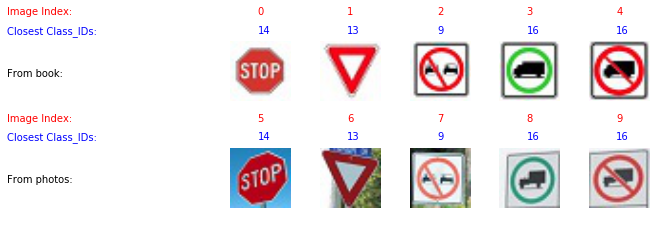

In [78]:
### Load the images and plot them here.

# image file names
# 10 images are loaded. all have already been scaled to 32 x 32 pixels and are in RGB format.
# all photos are valid traffic signs in British Columbia, Canada where I live.
# the image names ending in '-b' are taken from the "Manual of Standard Traffic Signs and Pavemetn Markings" published by
# the British Columbia Ministry of Transportation and Highways.
# the image names ending in '-r' are the corresponding same signs in real images taken on the road (taken from various websites)
image_names_list = [
    working_dir+'img1-b.jpg',
    working_dir+'img2-b.jpg',
    working_dir+'img3-b.jpg',
    working_dir+'img4-b.jpg',
    working_dir+'img5-b.jpg',
    working_dir+'img1-r.jpg',
    working_dir+'img2-r.jpg',
    working_dir+'img3-r.jpg',
    working_dir+'img4-r.jpg',
    working_dir+'img5-r.jpg']

image_list = []
for item in image_names_list:
    image_list.append(mpimg.imread(item))
image_list = np.asarray(image_list)

# printing statistics
print('Number of images: ', image_list.shape[0])
print('Shape of the images: ', image_list[0].shape)

closest_class_id = [14,13,9,16,16,14,13,9,16,16]

# PLotting the images
# defining the grid space and other  parameters
n_rows = 2
n_cols = 5
g_fig = gridspec.GridSpec(n_rows,n_cols) 
g_fig.update(wspace=0.5, hspace=0.75)

# setting up the figure
fig = plt.figure(figsize=(n_cols*1.5,n_rows*1.5))

ax_list = []
ax_list = plot_rows(ax_list, g_fig, n_rows, n_cols, 0, 0, image_list, verbose=False)
ax_list[0].text(-120,18,"From book:")
ax_list[5].text(-120,18,"From photos:")
ax_list[0].text(-120,-5,"Closest Class_IDs:", color='b')
ax_list[5].text(-120,-5,"Closest Class_IDs:", color='b')
ax_list[0].text(-120,-15,"Image Index:", color='r')
ax_list[5].text(-120,-15,"Image Index:", color='r')

for i in range(len(closest_class_id)):
    ax_list[i].text(14,-5,str(closest_class_id[i]),color='b')
    ax_list[i].text(14,-15,str(i),color='r')

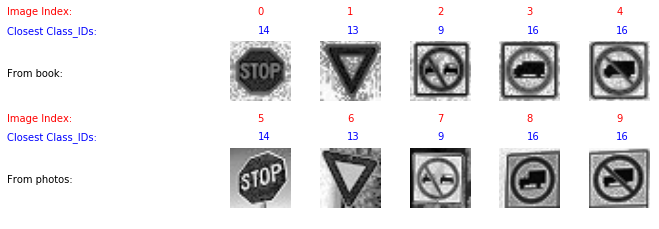

In [79]:
# preprocessing the loaded images

image_list_gray = color_to_gray(image_list) # changing to grayscale
image_list_hist = hist_equalize(image_list_gray) # euqlizing the histogram

# setting up the figure
fig = plt.figure(figsize=(n_cols*1.5,n_rows*1.5))
ax_list = []
ax_list = plot_rows(ax_list, g_fig, n_rows, n_cols, 0, 0, image_list_hist, cmap='gray', verbose=False)
ax_list[0].text(-120,18,"From book:")
ax_list[5].text(-120,18,"From photos:")
ax_list[0].text(-120,-5,"Closest Class_IDs:", color='b')
ax_list[5].text(-120,-5,"Closest Class_IDs:", color='b')
ax_list[0].text(-120,-15,"Image Index:", color='r')
ax_list[5].text(-120,-15,"Image Index:", color='r')

for i in range(len(closest_class_id)):
    ax_list[i].text(14,-5,str(closest_class_id[i]),color='b')
    ax_list[i].text(14,-15,str(i),color='r')

image_list_norm = img_normalize(image_list_hist) # normalizing the pixel values


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

10 images are loaded here. All of them have already been scaled down to 32 x 32 pixels before loading to the notebook, and are in RGB format. All photos are valid traffic signs in British Columbia, Canada where I live. The image names ending in '-b' are taken from the "Manual of Standard Traffic Signs and Pavement Markings" published by the British Columbia Ministry of Transportation and Highways (i.e. top rows plotted above). The image names ending in '-r' are the corresponding same signs in real images (adopted from various websites - i.e. bottom rows as plotted above).

- The first images from left (as plotted above - indices 0 and 5) are exactly similar to the Class_ID of 14 in the German database (label = "Stop").
- The second images from left (as plotted above - indices 1 and 6) are exactly similar to the Class_ID of 13 in the German database (label = "Yield").
- The third images from left (as plotted above - indices 2 and 7) are similar to the Class_ID of 9 in the German database (label = "No Passing"). However, there is a line on the sign here that is not present in the German database. This may pose some difficulty for the classifier to correctly classify these two images.
- The fourth images from left (as plotted above - indices 3 and 8) are similar to Class_ID of 16 in the German database (label = Vehicles over 3.5 metric tons prohibited). Although similar in form, the meaning of this sign is completely different in BC, and it means "Truck Route". Therefore, even if the network classifies this sign correctly, the meaning is different from Germany. This is reflected in different colors in the sign that will not be passed on to the network. Also the shape of the truck is slightly different from the shape of the truck in the German database in image index 8.
- The fifth images from left (as plotted above - indices 4 and 9) are not in German database, but are somewhat similar to Class_ID of 16 in the German database (label = Vehicles over 3.5 metric tons prohibited), except that these signs have a line crossing them. Also the shape of the truck is slightly different from the shape of the truck in the German database in image index 9.

The first two signs from the left (as plotted above) should be relatively easy for the network to classify. The third and fifth signs from the left (as plotted above) should be somewhat more difficult for the network to classify because of the additional line crossing them. The fourth sings from the left (as plotted above) may be easy to classify, but means differently in BC.

---


In [70]:
### loading the right network if requried
#saver = tf.train.Saver()
#epoch_to_load = 12
#s_file = working_dir+'m1f'+'-'+str(epoch_to_load-1)
#saver.restore(sess, s_file)

# calculating softmax probabilities
num_top_k = 5
probs, values, indices = calculate_predictions(sess, image_list_norm, num_top_k)
    

In [71]:
pred_classes = [indices[0][i][0] for i in range(10)]
print('Predicted classes for the 10 new images:           ', pred_classes)
print('Closest matching class_ids in the German database: ', closest_class_id)
accuracy=sum([i==j for i,j in zip(pred_classes,closest_class_id)])/10
print('Accuracy of the network in predicting new test images = {}'.format(accuracy))


Predicted classes for the 10 new images:            [14, 13, 9, 16, 16, 14, 13, 9, 16, 16]
Closest matching class_ids in the German database:  [14, 13, 9, 16, 16, 14, 13, 9, 16, 16]
Accuracy of the network in predicting new test images = 1.0


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

As shown above, the model classifies all of the new images correctly (i.e. 100% accuracy), which is great.

---

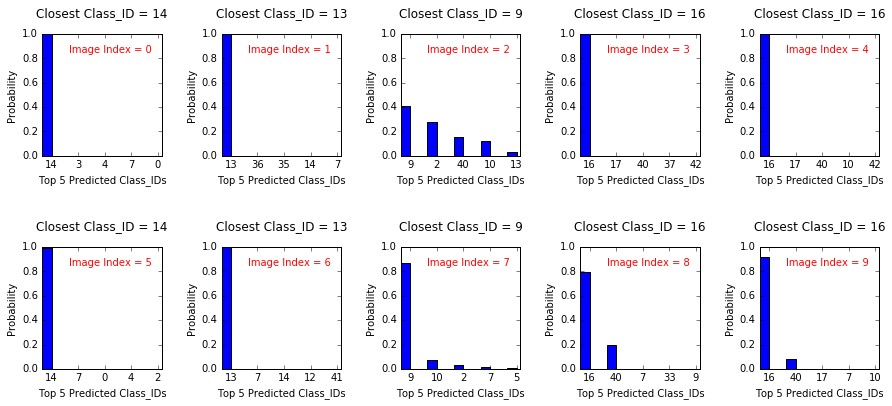

In [80]:
def plot_top_k(ax_list, grid_fig, image_num, pred_cls, pred_prob, num_k, title, text):
    
    ax_list.append(plt.subplot(grid_fig[image_num]))
    
    ind = np.arange(num_k)  # the x locations for the groups
    width = 0.35       # the width of the bars
    ax_list[-1].bar(ind, pred_prob, width, color='b')
    ax_list[-1].set_xticks(ind + width)
    ax_list[-1].set_xticklabels(pred_cls)
    ax_list[-1].set_title(title, y=1.1)
    ax_list[-1].set_ylabel('Probability')
    ax_list[-1].set_ylim(0,1)
    ax_list[-1].set_xlabel('Top {} Predicted Class_IDs'.format(num_k))
    ax_list[-1].text(1,0.85,text,color='r')
    
    return ax_list


# PLotting the images
# defining the grid space and other  parameters
n_rows = 2
n_cols = 5
g_fig = gridspec.GridSpec(n_rows,n_cols) 
g_fig.update(wspace=0.5, hspace=0.75)

# setting up the figure
fig = plt.figure(figsize=(n_cols*3,n_rows*3))

ax_list = []
for i in range(len(indices[0])):
    plot_top_k(ax_list, g_fig, i, indices[0][i], values[0][i], num_top_k, 
               "Closest Class_ID = {}".format(closest_class_id[i]), "Image Index = {}".format(i))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In all cases except the middle images (as presented above - indices 2 and 7), the classifier is fairly confident of its selection. In the case of the middle images to the right (indices 2 and 7), the classifier is less confident perhaps due to the presence of a crossing line on the sign, which is not in the German database. The classifier is also a bit less confident in case of image indices 8 and 9, which contain truck images that are slightly different from the German database.

Overall, however, it performs very well on new images shown here.

---

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [66]:
sess.close()